# Домашнє завдання
## Зміст завдання:

Скачати дані файлу Data2.csv.

1. Подивитись, проаналізувати структуру.
2. Вказати, чи є параметри, що розподілені за нормальним законом.
3. Перевірити середні та медіани на значимість.
4. Вказати, в якому регіоні розподіл викидів СО2 найбільш близький до нормального.
5. Побудувати кругову діаграму населення по регіонам.

## Хід роботи:
1. Для обробки та аналізу данних та побудови графіків встановимо відповідні бібліотеки:
- Pandas - для роботи з датасетом;
- Matplotlib - для створення графіків;
- SciPy - для статистичного аналізу даних.

In [ ]:
!pip install pandas matplotlib scipy -q

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

2. Далі зчитаємо дані з файлу Data2.csv у data frame Pandas:

In [3]:
DATA_PATH = 'data/Data2.csv'

# Зчитуємо файл із заданим розділяючим символом ";"
df = pd.read_csv(DATA_PATH, sep=';')

3. Виправимо помилки в даних (кроки аналогічні 2-й практичній роботі):

In [4]:
def convert_column_to_float(dataset, column_label):
    dataset[column_label] = dataset[column_label] \
        .str.replace(',', '.') \
        .astype(float)

convert_column_to_float(df, 'GDP per capita')
convert_column_to_float(df, 'CO2 emission')
convert_column_to_float(df, 'Area')

# Поміняємо знак від'ємних значень:
df.loc[df['GDP per capita'] < 0, 'GDP per capita'] *= -1
df.loc[df['Area'] < 0, 'Area'] *= -1

# Заповнимо пропущені значення середніми значеннями відповідних колонок:
df = df.fillna(df.mean())

4. Виведемо інформацію про отриманий датафрейм:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    217 non-null    object 
 1   Region          217 non-null    object 
 2   GDP per capita  217 non-null    float64
 3   Population      217 non-null    float64
 4   CO2 emission    217 non-null    float64
 5   Area            217 non-null    float64
dtypes: float64(4), object(2)
memory usage: 10.3+ KB


5. Виведемо перші 5 рядків датафрейму:

In [7]:
df.head()

,Country Name,Region,GDP per capita,Population,CO2 emission,Area
0,Afghanistan,South Asia,561.778746,34656032.0,9809.225000,652860.0
1,Albania,Europe & Central Asia,4124.982390,2876101.0,5716.853000,28750.0
2,Algeria,Middle East & North Africa,3916.881571,40606052.0,145400.217000,2381740.0
3,American Samoa,East Asia & Pacific,11834.745230,55599.0,165114.116337,200.0
4,Andorra,Europe & Central Asia,36988.622030,77281.0,462.042000,470.0


6. Виведемо описову статистику датафрейму:

In [37]:
df.describe()

,GDP per capita,Population,CO2 emission,Area
count,217.000000,2.170000e+02,2.170000e+02,2.170000e+02
mean,13445.593416,3.432256e+07,1.651141e+05,6.188441e+05
std,16873.922101,1.344477e+08,8.100511e+05,1.827830e+06
min,285.727442,1.109700e+04,1.100100e+01,2.000000e+00
25%,2361.160205,7.956010e+05,1.954511e+03,1.088700e+04
50%,7179.340661,6.293253e+06,1.156205e+04,9.303000e+04
75%,14428.140260,2.369592e+07,8.256251e+04,4.474200e+05
max,100738.684200,1.378665e+09,1.029193e+07,1.709825e+07


7. З'ясуємо, чи є в даних параметри, розподілені за нормальним законом. Для цього побудуємо гістограми для всіх кількісних параметрів датафрейму, а також застосуємо критерії нормальності Shapiro-Wilk та D’Agostino-Pearson:

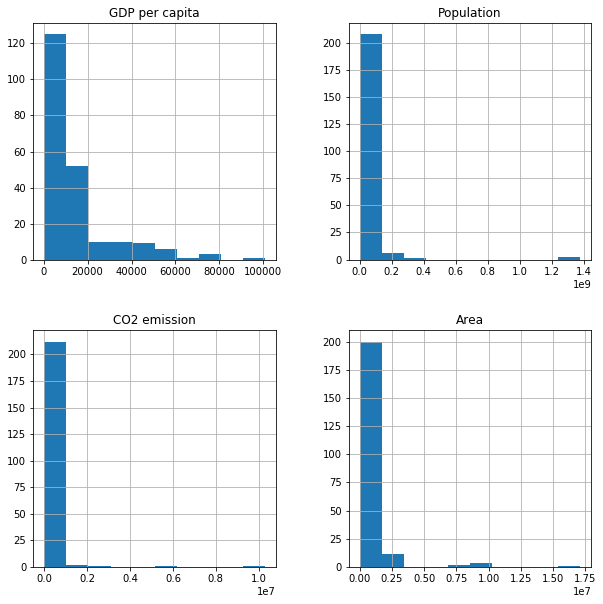

In [18]:
# Будуємо гістограми:
df.hist(figsize=(10, 10))

plt.show()

Візуально дані не є нормально розподіленими, проте, застосуємо критерії перевірки відповідності нормальному розподілу для впевненості:

In [8]:
def normality_test(data, test, alpha=0.05):
    '''
    Функція для перевірки відповідності емпіричного розподілу даних
    нормальному за заданим критерієм. Виводить, чи варто відкидати
    нульову гіпотезу.

    Параметри:
    ----------
    data: array-like
        Аналізовані дані.
    test: callable
        Критерій для перевірки.
    alpha: float, optional, default=0.05
        Рівень значущості.

    Вертає:
    -------
    None
    '''
    stat, p = test(data)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
    	print('Дані відповідають нормальному розподілу (нульова гіпотеза H0 не відкидається)')
    else:
    	print('Дані не відповідають нормальному розподілу (нульова гіпотеза H0 відкидається)')


# Перевіряємо методом Shapiro-Wilk:
normality_test(df['GDP per capita'], stats.shapiro)
normality_test(df['Population'], stats.shapiro)
normality_test(df['CO2 emission'], stats.shapiro)
normality_test(df['Area'], stats.shapiro)

Statistics=0.731, p=0.000
Дані не відповідають нормальному розподілу (нульова гіпотеза H0 відкидається)
Statistics=0.217, p=0.000
Дані не відповідають нормальному розподілу (нульова гіпотеза H0 відкидається)
Statistics=0.174, p=0.000
Дані не відповідають нормальному розподілу (нульова гіпотеза H0 відкидається)
Statistics=0.338, p=0.000
Дані не відповідають нормальному розподілу (нульова гіпотеза H0 відкидається)


In [9]:
# Перевіряємо методом D’Agostino-Pearson:
normality_test(df['GDP per capita'], stats.normaltest)
normality_test(df['Population'], stats.normaltest)
normality_test(df['CO2 emission'], stats.normaltest)
normality_test(df['Area'], stats.normaltest)

Statistics=110.278, p=0.000
Дані не відповідають нормальному розподілу (нульова гіпотеза H0 відкидається)
Statistics=370.214, p=0.000
Дані не відповідають нормальному розподілу (нульова гіпотеза H0 відкидається)
Statistics=406.218, p=0.000
Дані не відповідають нормальному розподілу (нульова гіпотеза H0 відкидається)
Statistics=284.697, p=0.000
Дані не відповідають нормальному розподілу (нульова гіпотеза H0 відкидається)


8. З'ясуємо, в якому регіоні кількість викидів CO2 має розподіл близький до нормального:

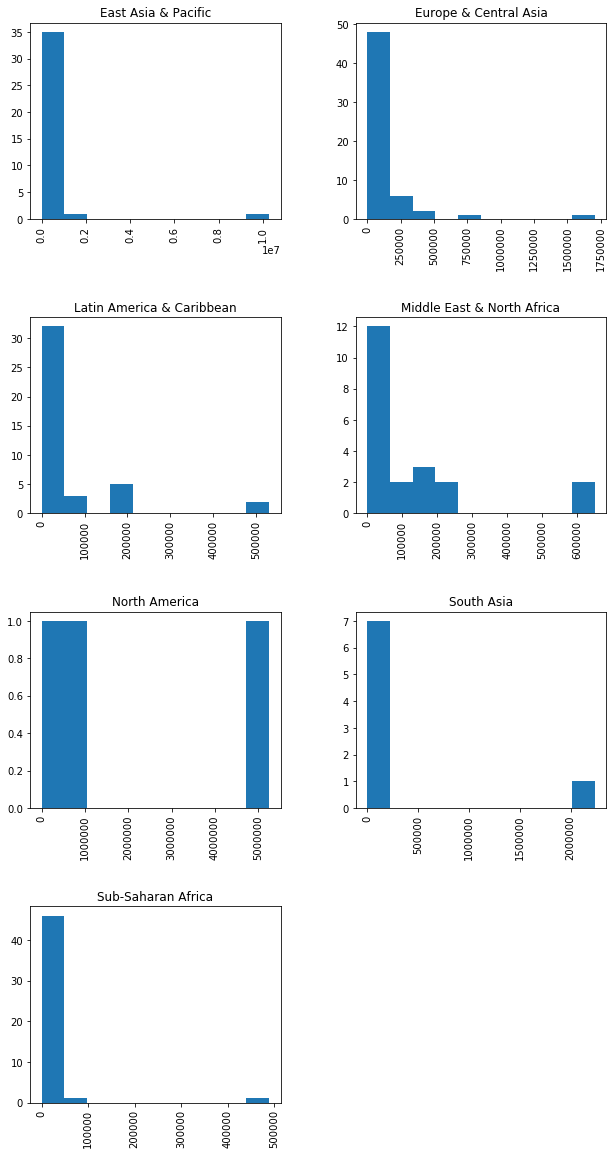

In [7]:
# Будуємо гістограми викидів по регіонам:
df['CO2 emission'].hist(by=df['Region'], layout=(4, 2), figsize=(10, 20))

plt.show()

In [17]:
regions = pd.unique(df['Region'])

for region in regions:
    region_emissions = df[df['Region'] == region]['CO2 emission']

    print(f'\nПеревірка для регіону {region}:')

    # Перевіряємо методом Shapiro-Wilk:
    print(f'Критерій Shapiro-Wilk:')
    try:
        normality_test(region_emissions, stats.shapiro)
    except ValueError as e:
        print(str(e))

    # Перевіряємо методом D’Agostino-Pearson:
    print(f'Критерій D’Agostino-Pearson:')
    try:
        normality_test(region_emissions, stats.normaltest)
    except ValueError as e:
        print(str(e))


Перевірка для регіону South Asia:
Критерій Shapiro-Wilk:
Statistics=0.473, p=0.000
Дані не відповідають нормальному розподілу (нульова гіпотеза H0 відкидається)
Критерій D’Agostino-Pearson:
Statistics=22.551, p=0.000
Дані не відповідають нормальному розподілу (нульова гіпотеза H0 відкидається)

Перевірка для регіону Europe & Central Asia:
Критерій Shapiro-Wilk:
Statistics=0.470, p=0.000
Дані не відповідають нормальному розподілу (нульова гіпотеза H0 відкидається)
Критерій D’Agostino-Pearson:
Statistics=95.175, p=0.000
Дані не відповідають нормальному розподілу (нульова гіпотеза H0 відкидається)

Перевірка для регіону Middle East & North Africa:
Критерій Shapiro-Wilk:
Statistics=0.664, p=0.000
Дані не відповідають нормальному розподілу (нульова гіпотеза H0 відкидається)
Критерій D’Agostino-Pearson:
Statistics=22.295, p=0.000
Дані не відповідають нормальному розподілу (нульова гіпотеза H0 відкидається)

Перевірка для регіону East Asia & Pacific:
Критерій Shapiro-Wilk:
Statistics=0.229, 

Як бачимо, викиди по всім регіонам не є нормально розподіленими.

9. Побудуємо кругову діаграму населення по регіонам:

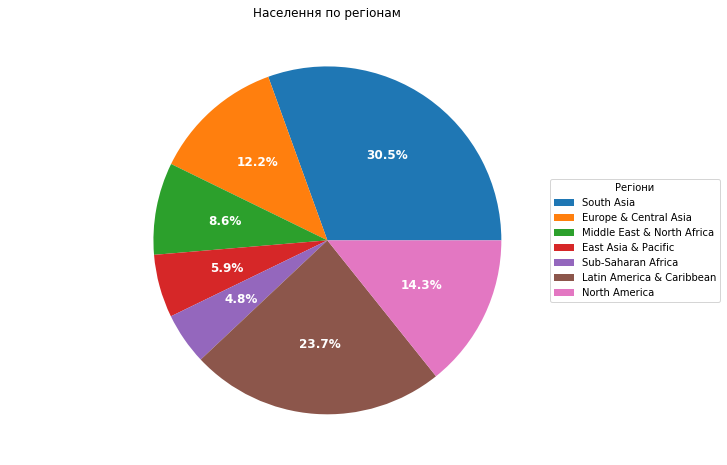

In [10]:
fig, ax = plt.subplots(figsize=(8, 8))

labels = pd.unique(df['Region'])

wedges, texts, autotexts = ax.pie(df.groupby('Region').sum()['Population'], labels=labels,
                                  autopct='%1.1f%%', textprops=dict(color='w'))

ax.set_title('Населення по регіонам')
ax.legend(wedges, labels,
          title='Регіони',
          loc='center left',
          bbox_to_anchor=(1, 0, 0, 1))

plt.setp(autotexts, size=12, weight='bold')

plt.show()